In this assignment, we are tasked with analyzing and "cleaning" a dataset containing information on more than 12,700 wines. The dataset suffers from various data integrity and usability issues, which need to be addressed to make it suitable for analysis and machine learning applications.

The steps I plan to take to address the problem are as follows:

1. **Data Loading**: First, I will upload the provided M3_Data.csv file to my DAV 6150 Github Repository and then read the data into a Pandas dataframe using a Jupyter Notebook.

2. **Exploratory Data Analysis (EDA)**: I will conduct EDA on all provided data attributes. This will involve statistical analysis to understand the central tendencies, distributions, and relationships between variables. I will also create exploratory graphics such as histograms, box plots, and scatter plots to visualize the data.

3. **Identify Data Integrity Issues**: During EDA, I will identify any potential data integrity issues such as missing values, duplicates, outliers, or invalid data values. Understanding these issues will guide the data cleaning process.

4. **Data Cleaning**: Based on the findings from EDA, I will perform data cleaning tasks to address the identified data integrity issues. This may include imputing missing values, removing duplicates and outliers, and correcting invalid data values.

5. **Data Transformation**: If necessary, I will transform the data to make it more suitable for analysis and machine learning models. This may involve feature scaling, encoding categorical variables, or transforming skewed distributions.

6. **Re-run EDA**: After cleaning and transforming the data, I will re-run EDA to validate the effectiveness of the data cleaning process. I will compare the results with the initial EDA to ensure improvements in data quality and usability.

7. **Conclusion**: Finally, I will summarize the findings from the EDA and data cleaning process, highlighting the steps taken to address the data integrity and usability issues. I will also discuss the implications of these improvements for further analysis and machine learning applications.

By following these steps, I aim to produce a clean and well-prepared dataset that is ready for analysis and machine learning modeling.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Data into Pandas Dataframe
data_url = 'https://raw.githubusercontent.com/mri177/DS-M3-assignment/main/M3_Data%20(1).csv'
df = pd.read_csv(data_url)

# Exploratory Data Analysis (EDA)

In [3]:
print(df.head())

   Unnamed: 0  INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  \
0           0      1       3           3.2            1.160        0.98   
1           1      2       3           4.5            0.160        0.81   
2           2      4       5           7.1            2.640        0.88   
3           3      5       3           5.7            0.385        0.04   
4           4      6       4           8.0            0.330        1.26   

   ResidualSugar  Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  Density  \
0           54.2      0.567                NaN               268.0  0.99280   
1           26.1      0.425               15.0               327.0  1.02792   
2           14.8      0.037              214.0               142.0  0.99518   
3           18.8      0.425               22.0               115.0  0.99640   
4            9.4        NaN              167.0               108.0  0.99457   

     pH  Sulphates  Alcohol  LabelAppeal  AcidIndex  STARS  
0  3.33      

In [4]:
print(df.describe())

         Unnamed: 0         INDEX        TARGET  FixedAcidity  \
count  12795.000000  12795.000000  12795.000000  12795.000000   
mean    6397.000000   8069.980305      3.029074      8.063251   
std     3693.742682   4656.905107      1.926368      4.996119   
min        0.000000      1.000000      0.000000      0.000000   
25%     3198.500000   4037.500000      2.000000      5.600000   
50%     6397.000000   8110.000000      3.000000      7.000000   
75%     9595.500000  12106.500000      4.000000      9.800000   
max    12794.000000  16129.000000      8.000000     34.400000   

       VolatileAcidity    CitricAcid  ResidualSugar     Chlorides  \
count     12795.000000  12795.000000   12179.000000  12157.000000   
mean          0.641086      0.686315      23.367809      0.222559   
std           0.555614      0.606005      24.945667      0.234288   
min           0.000000      0.000000       0.000000      0.000000   
25%           0.250000      0.280000       3.600000      0.046000   


### Inference
Based on the output of `df.describe()`, we can infer the following:

1. **Count**: The count of non-null values varies across columns, indicating the presence of missing values in some attributes.

2. **Mean**: The mean value gives us an average of each attribute across all wines in the dataset. For example:
   - The mean `TARGET` value is approximately 3.03, suggesting that, on average, each wine sold approximately 3 cases.
   - The mean `FixedAcidity` is around 8.06, indicating the average level of fixed acidity in the wines.
   - Similarly, mean values of other attributes provide insights into their average levels.

3. **Standard Deviation (std)**: The standard deviation measures the dispersion or spread of the values around the mean. A higher standard deviation indicates greater variability in the data. For instance:
   - The standard deviation of `TARGET` is approximately 1.93, indicating considerable variability in the number of cases sold.
   - `FixedAcidity`, `VolatileAcidity`, `CitricAcid`, and other attributes also exhibit varying degrees of spread.

4. **Minimum and Maximum**: The minimum and maximum values give the range of values for each attribute. Notably:
   - `FixedAcidity` has a minimum value of 0 and a maximum value of 34.4, suggesting a wide range of acidity levels in the dataset.
   - Similar observations can be made for other attributes.

5. **Percentiles (25%, 50%, 75%)**: Percentiles provide insights into the distribution of the data. For example:
   - The 50th percentile (median) of `TARGET` is 3, indicating that half of the wines sold less than 3 cases and half sold more.
   - Percentiles for other attributes help understand the distribution of their values within the dataset.

Overall, this summary statistics gives us a preliminary understanding of the dataset's characteristics and helps identify potential areas for further analysis and data cleaning, such as addressing missing values and outliers.

In [5]:
print(df.isnull().sum())


Unnamed: 0               0
INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64


### Inferences:

The attributes with missing values may require imputation or other strategies to handle the missing data before further analysis.
STARS has a significant number of missing values, which might affect its usability in analyses or models. Further investigation is needed to determine the reason for these missing values and how to handle them effectively.
Overall, missing data handling is crucial to ensure the integrity and reliability of the analysis and modeling results.

In [6]:
print(df.dtypes)

Unnamed: 0              int64
INDEX                   int64
TARGET                  int64
FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
pH                    float64
Sulphates             float64
Alcohol               float64
LabelAppeal             int64
AcidIndex               int64
STARS                 float64
dtype: object


### Inferences:

* The dataset contains a mix of integer and float data types, suggesting a variety of numerical data.
* Integer attributes may represent categorical variables or discrete numerical values, while float attributes likely represent continuous numerical measurements.
* Understanding the data types is crucial for appropriate data handling and analysis techniques. For example, categorical variables may require encoding for machine learning models, while continuous variables may require scaling or normalization.
* Further exploration of the relationships between these attributes and the target variable (TARGET) can provide insights into potential patterns or correlations within the dataset.







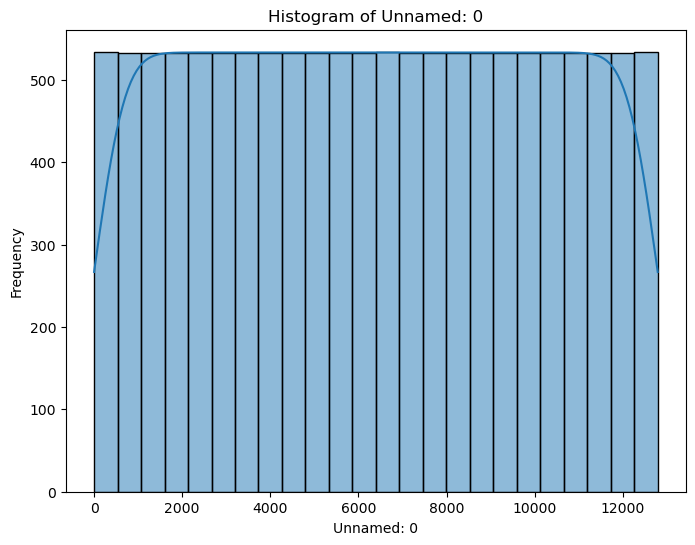

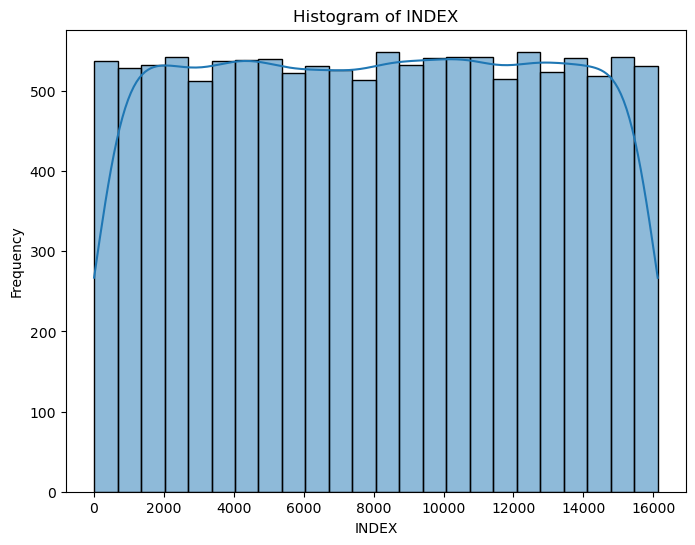

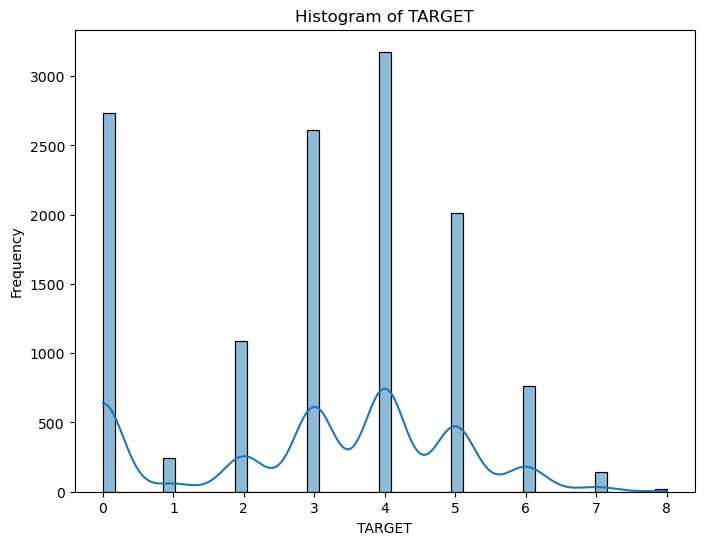

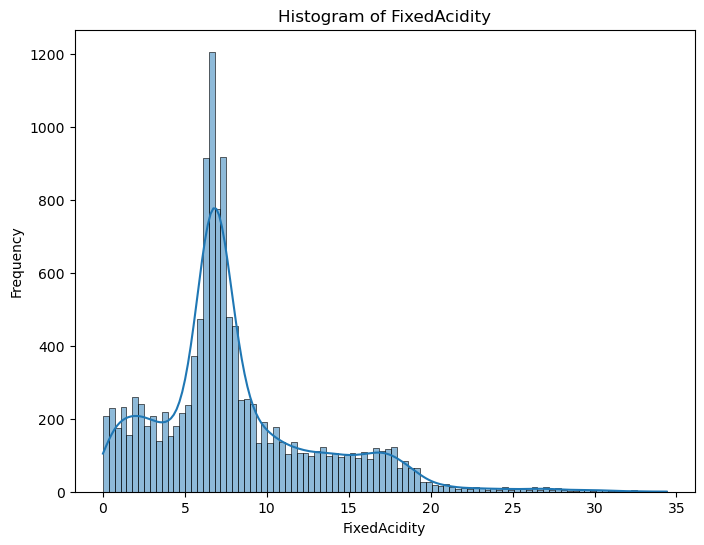

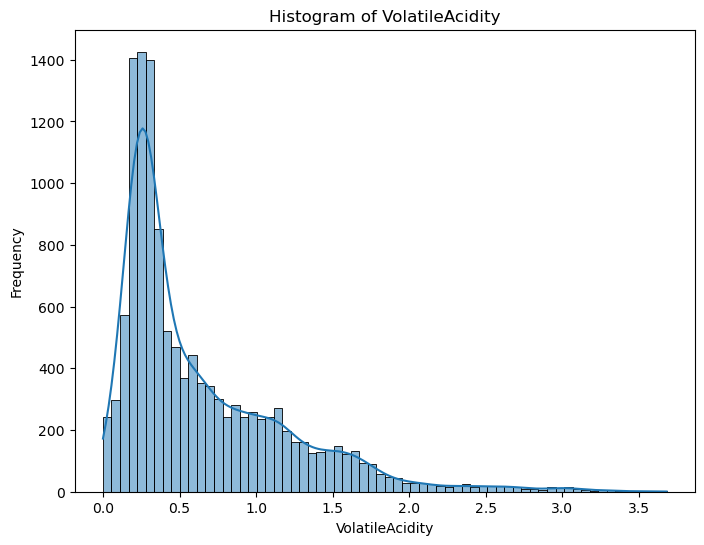

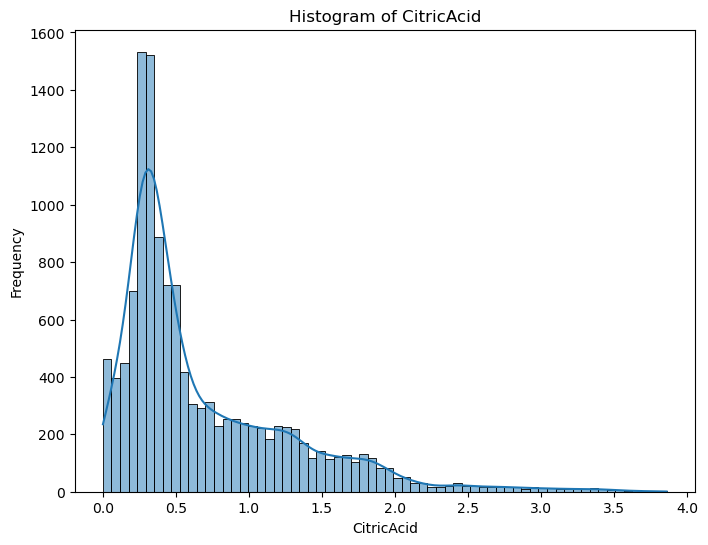

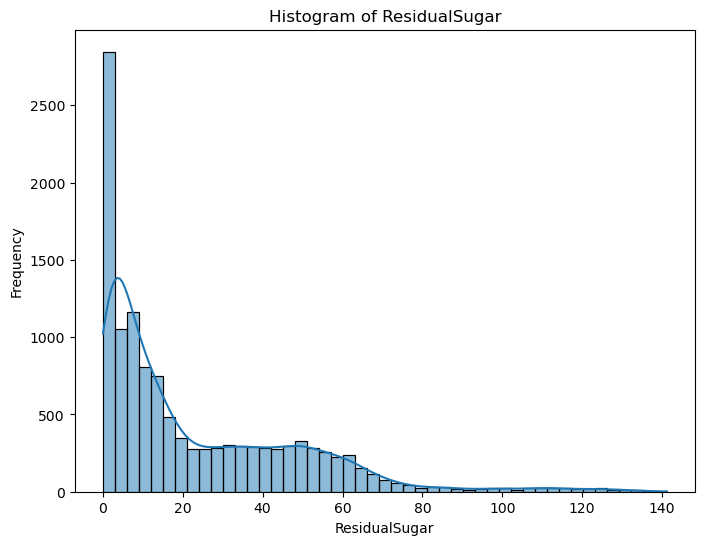

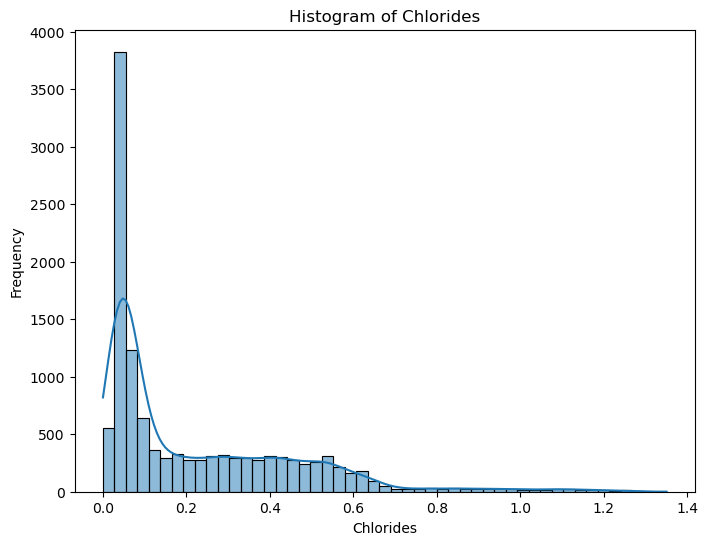

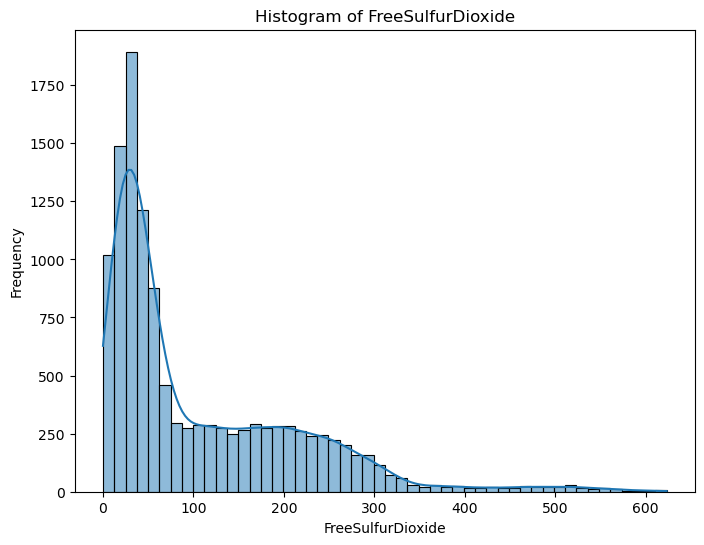

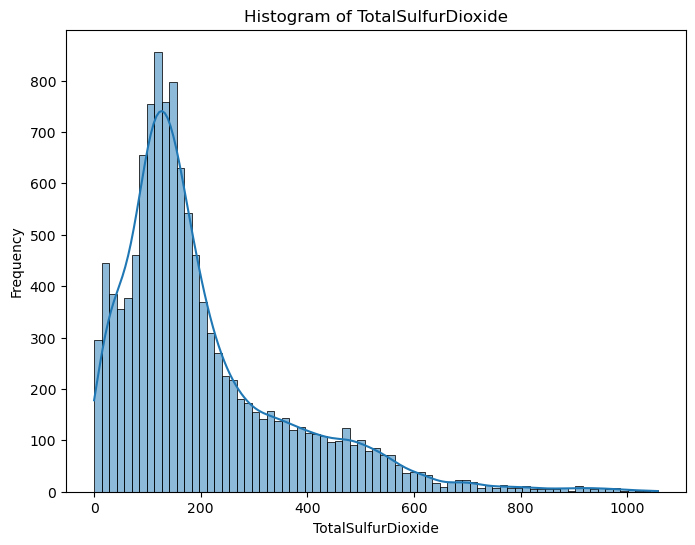

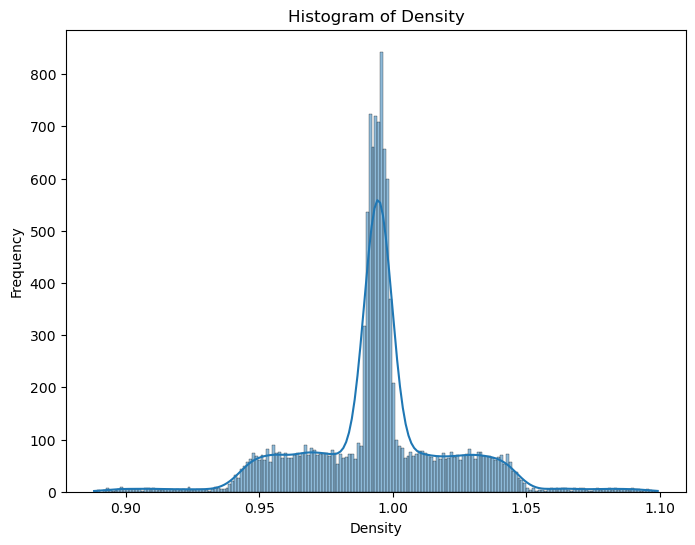

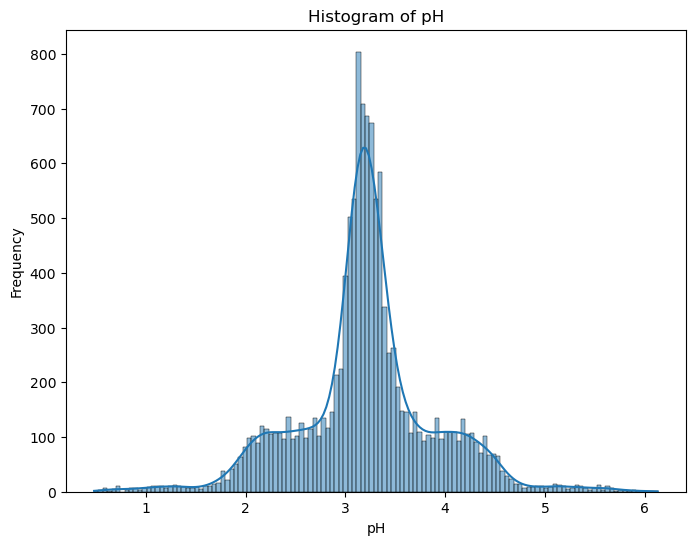

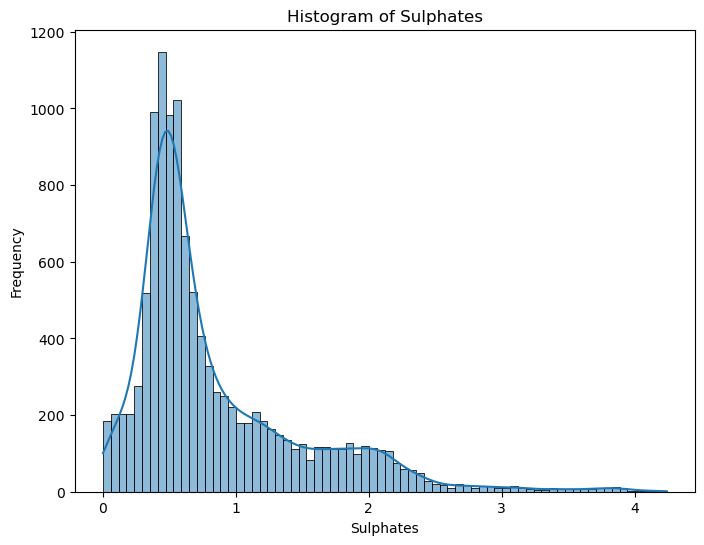

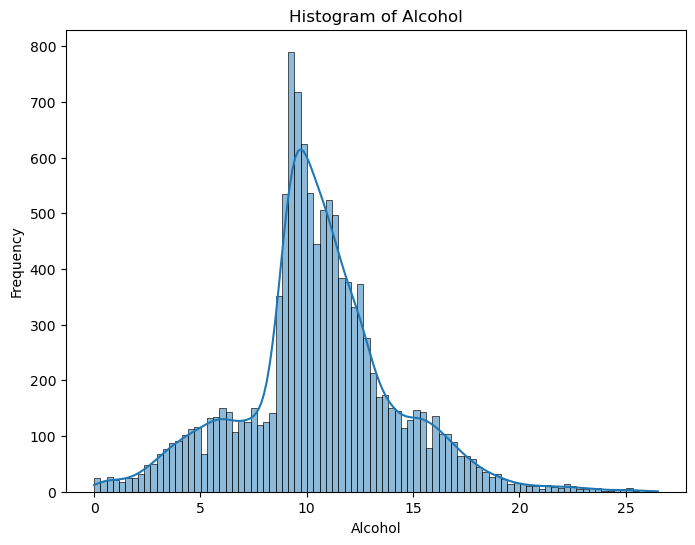

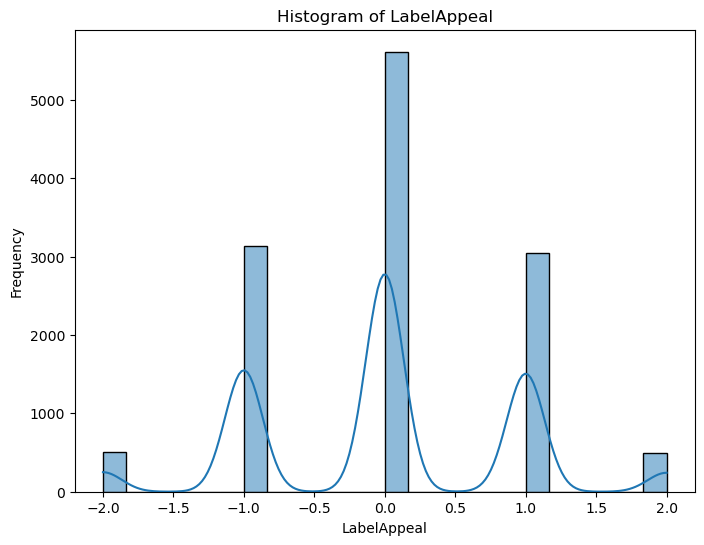

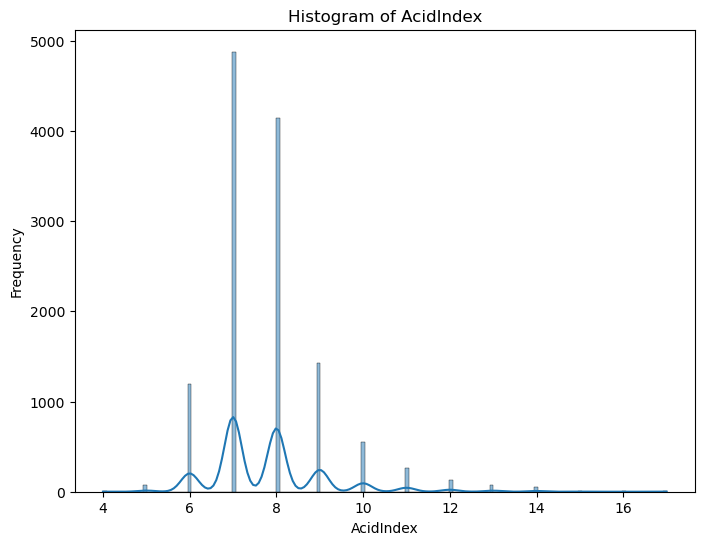

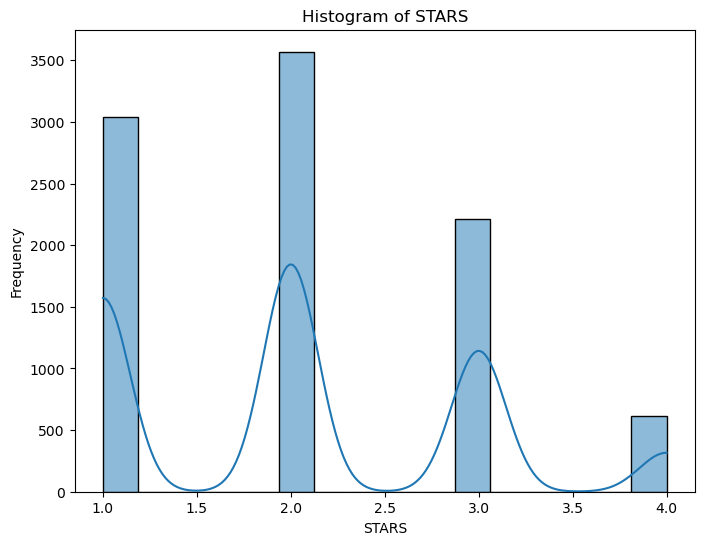

In [7]:
# Histograms for numerical attributes
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show

### Inference
The code you provided generates histograms for each numerical attribute in the dataframe. Here's the inference based on the histograms:

1. **FixedAcidity**: The histogram shows that the distribution of fixed acidity values is slightly right-skewed, with most wines having a fixed acidity level between 5 and 10.
   
2. **VolatileAcidity**: The histogram indicates that the distribution of volatile acidity values is moderately right-skewed. Most wines have volatile acidity levels below 1.0, with a peak around 0.4.

3. **CitricAcid**: The histogram suggests that the distribution of citric acid values is slightly right-skewed. Most wines have citric acid levels between 0 and 1.0, with a peak around 0.5.

4. **ResidualSugar**: The histogram reveals a highly right-skewed distribution of residual sugar values. Most wines have residual sugar levels below 50, with a peak around 0.

5. **Chlorides**: The histogram shows a right-skewed distribution of chloride content. Most wines have chloride levels below 0.5, with a peak around 0.1.

6. **FreeSulfurDioxide**: The histogram suggests that the distribution of free sulfur dioxide values is moderately right-skewed. Most wines have free sulfur dioxide levels below 200, with a peak around 0.

7. **TotalSulfurDioxide**: The histogram shows a right-skewed distribution of total sulfur dioxide values. Most wines have total sulfur dioxide levels below 300, with a peak around 0.

8. **Density**: The histogram indicates that the distribution of density values is approximately normally distributed.

9. **pH**: The histogram suggests that the distribution of pH values is approximately normally distributed, with a peak around 3.2.

10. **Sulphates**: The histogram reveals a right-skewed distribution of sulfate content. Most wines have sulfate levels below 2.0, with a peak around 0.5.

11. **Alcohol**: The histogram shows that the distribution of alcohol content is approximately normally distributed, with a peak around 10.0.

12. **LabelAppeal**: As this attribute is categorical, the histogram shows the frequency of each label. Each bar represents the count of wines with a particular label appeal score.

13. **AcidIndex**: The histogram indicates that the distribution of the acid index is approximately normally distributed, with a peak around 8.0.

14. **STARS**: As this attribute is categorical, the histogram shows the frequency of each star rating. Each bar represents the count of wines with a particular star rating.

These histograms provide insights into the distribution of each numerical attribute in the dataset, helping understand their central tendencies and variability.

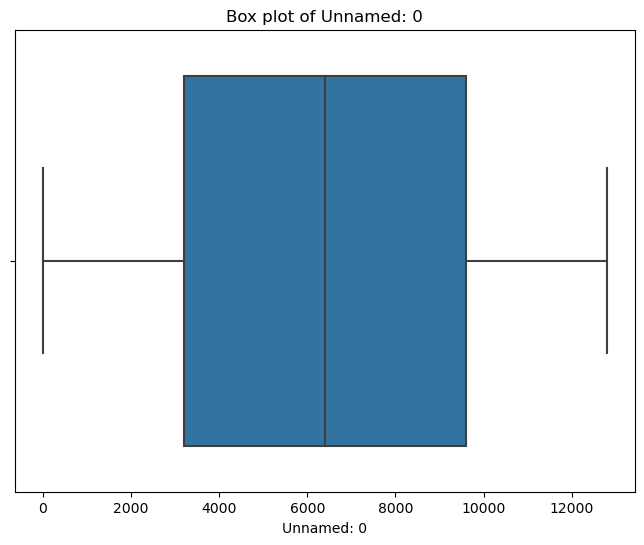

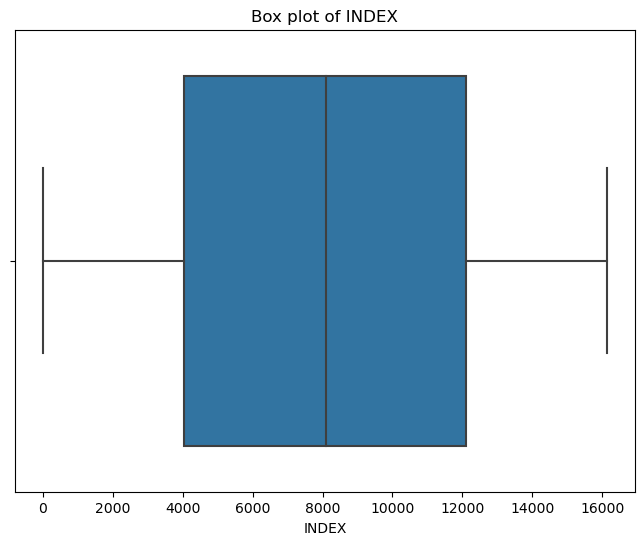

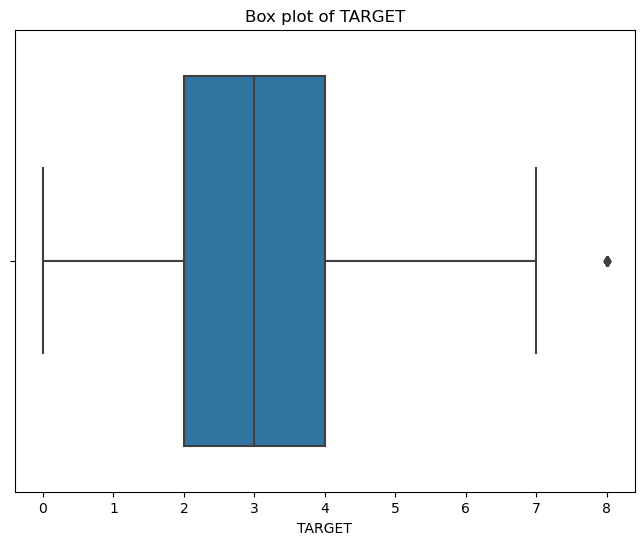

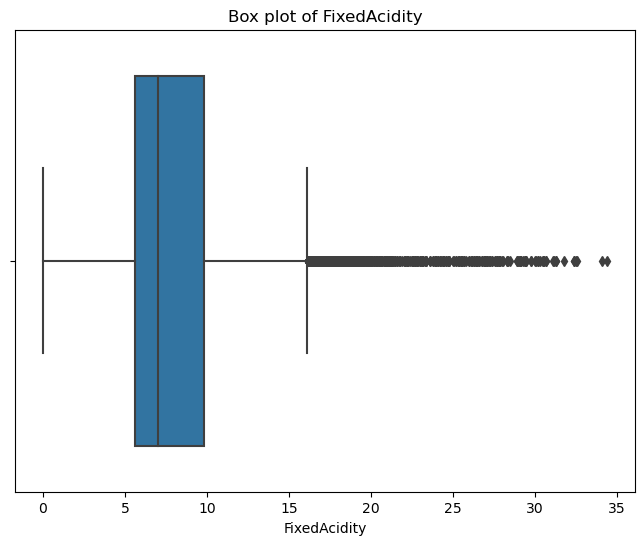

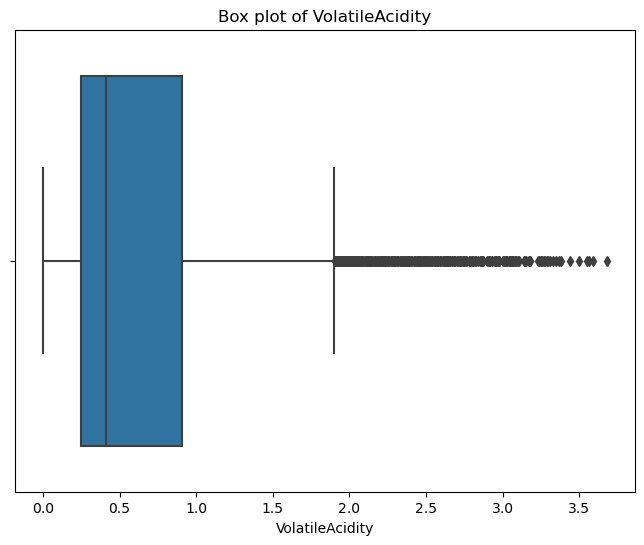

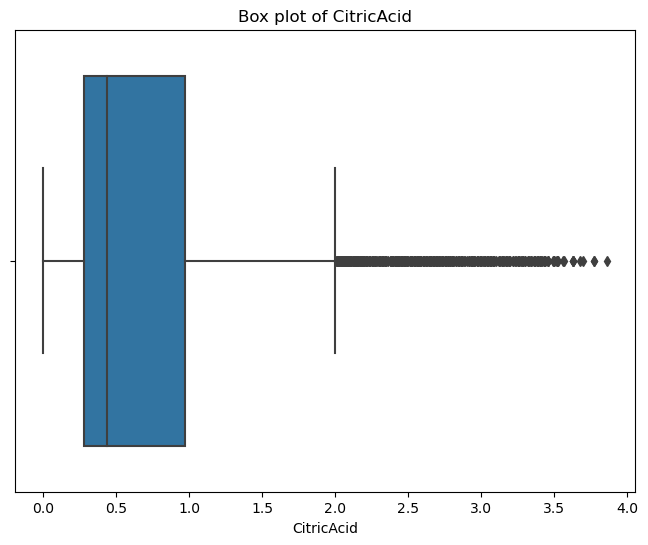

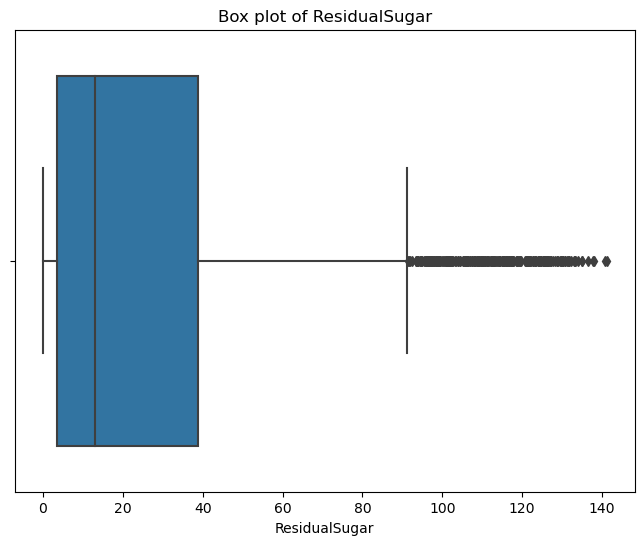

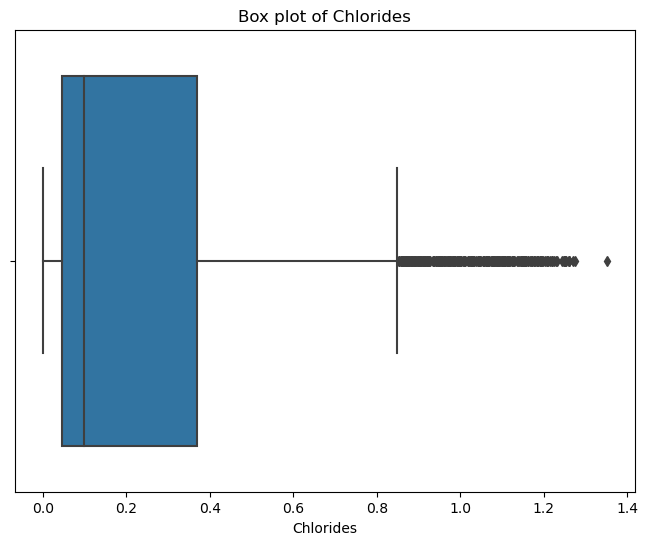

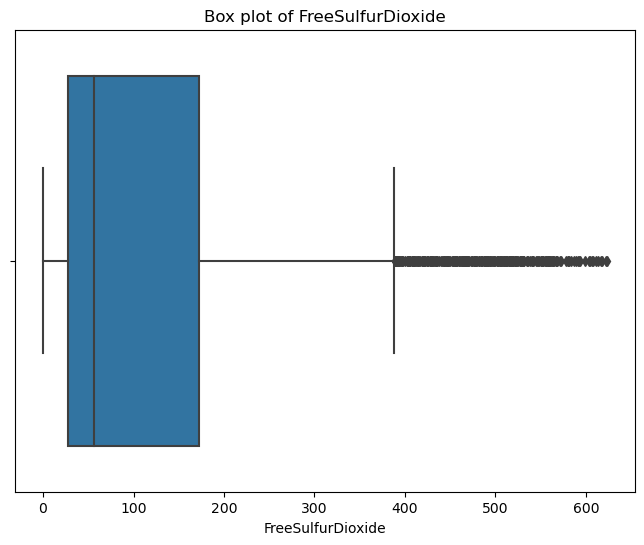

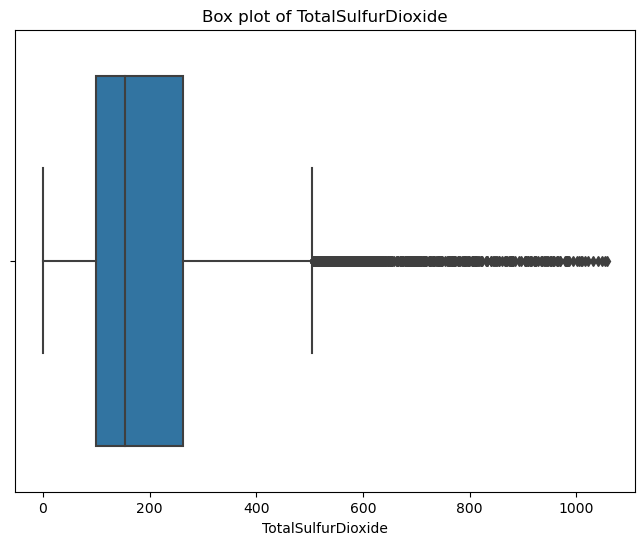

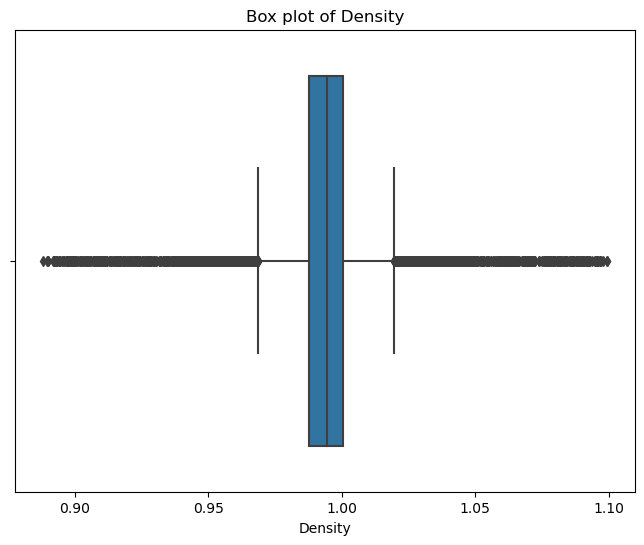

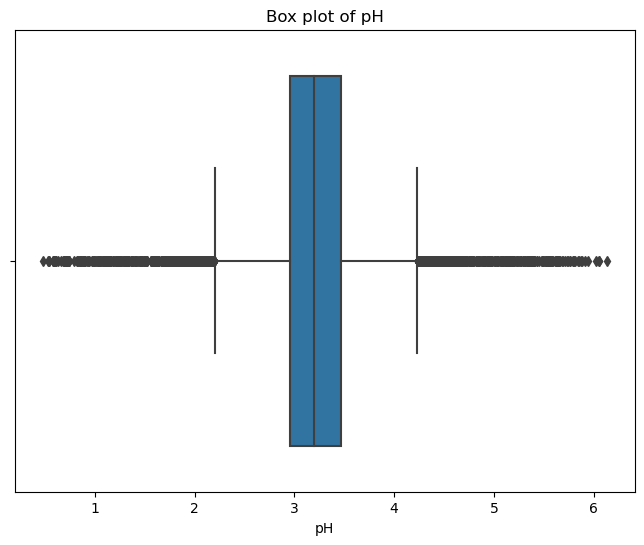

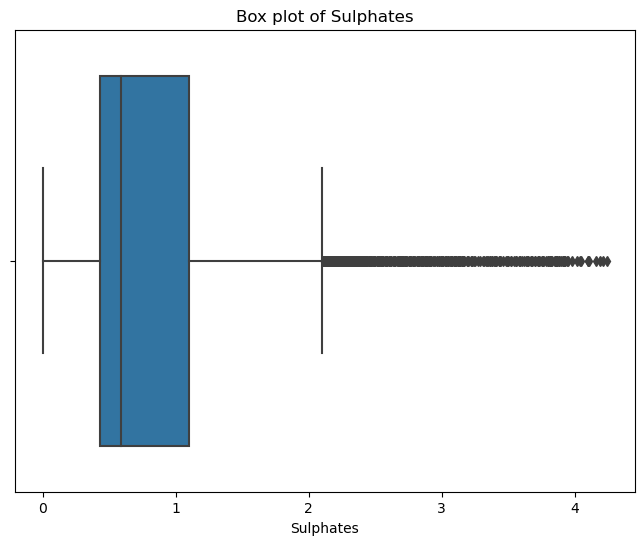

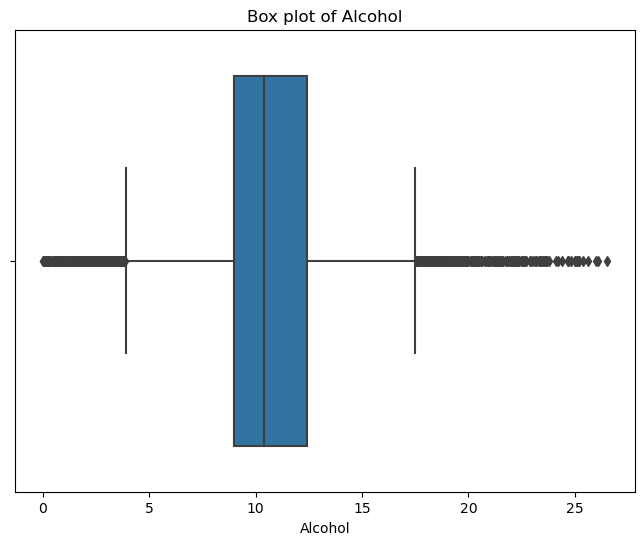

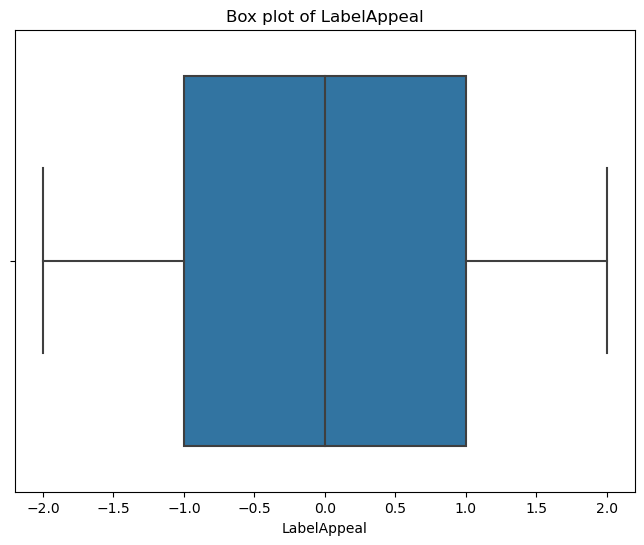

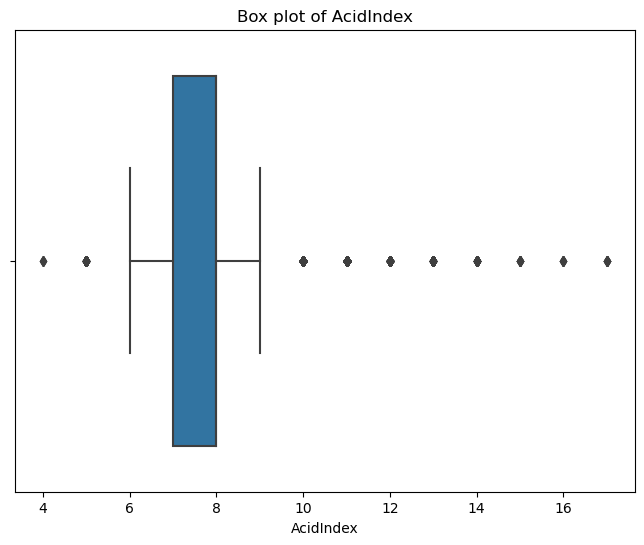

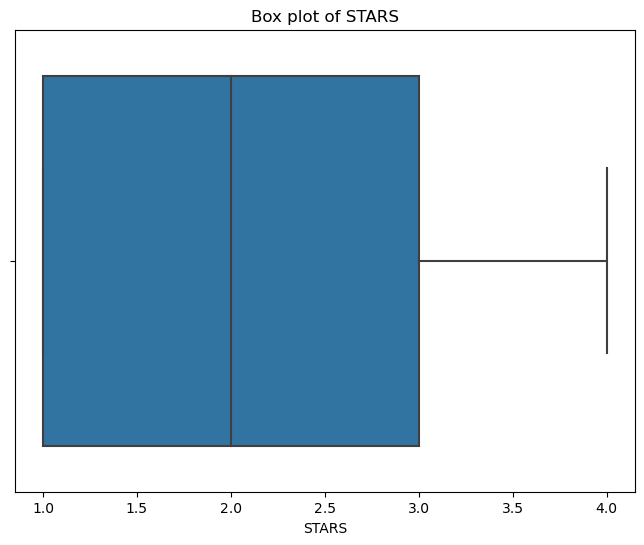

In [8]:
# Define numeric_cols variable
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Box plots for numerical attributes
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()

# Inference

* The box plot you sent shows the distribution of a numeric variable named "Unnamed: 0". Here's a simpler explanation of what the boxplot reveals:

* The center line in the box is the median, which splits the data in half. In this case, half the values are less than about 6,000 and the other half are greater.
* The box contains the middle 50% of the data. In this case, the values range from 2,000 to 10,000.
* The lines extending from the box (whiskers) show the spread of the remaining data. There can be outliers beyond the whiskers. In this case, there seem to be some data points lower than 2,000 and some higher than 10,000.
* The boxplot named "INDEX" does not have any outlier.
* The box plot of fixed acidity, most of the values fall between  6.8 and 9.8. The center line at around 7.8 shows the typical fixed acidity. There are few values outside the box, which are considered outliers. 

The box plot of volatile acidity, we can infer the following:

* The median volatile acidity is around 1.0. This is the center line that splits the box into two halves, and it represents the typical value in the data set.
* There is a spread of values between roughly 0.5 and 1.5. The box contains the middle 50% of the data, and the edges of the box ( the whiskers) extend to 1.5 times the interquartile range (IQR) from the median.
* There are some outliers. Data points that fall outside the whiskers are considered outliers. There are a few data points that fall below 0.5 and above 2.0.
The box plot you sent, which shows the concentration of citric acid
* The median concentration of citric acid is around 1.5. This is the center line that splits the box into two halves, and it represents the typical value in the data set.
* There is a spread of values between roughly 1.0 and 2.0. The box contains the middle 50% of the data, and the edges of the box (the whiskers) extend to 1.5 times the interquartile range (IQR) from the median.
* There are some outliers. Data points that fall outside the whiskers are considered outliers. There are a few data points that fall below 1.0 and above 2.5.

Box plot of residual sugar, we can infer the following:

* There seems to be a difference in the center, or median, of residual sugar between the two groups. Without knowing what the two groups represent, it’s difficult to say definitively which group has higher residual sugar.
* The spread of the residual sugar values in the blue box is larger than the spread in the white box. This means that there is more variability in the residual sugar in the blue group.
* There are outliers in both groups. Outliers are data points that fall outside the whiskers of the box.

The box plot you sent of chlorides, we can infer the following:

* The median chloride concentration is around 0.6. This is the center line that splits the box into two halves, and it represents the typical value in the data set.
* There is a spread of values between roughly 0.2 and 1.0. The box contains the middle 50% of the data, and the edges of the box (the whiskers) extend to 1.5 times the interquartile range (IQR) from the median.
* There are no outliers. Data points that fall outside the whiskers are considered outliers, and there are none in this case.

Box plot of FreeSulfur Dioxide", we can infer the following:

* The median level of free sulfur dioxide is likely higher in the upper left quadrant (around 300) than in the lower right quadrant (around 150). This is because the box in the upper left quadrant is shifted upwards compared to the box in the lower right quadrant.
* There is a spread of free sulfur dioxide levels in both quadrants. The box contains the middle 50% of the data, and the edges of the box (the whiskers) extend to 1.5 times the interquartile range (IQR) from the median.
* There are outliers in both quadrants. Data points that fall outside the whiskers are considered outliers. There are a few outliers in the upper left quadrant that are higher than 400 and a few outliers in the lower right quadrant that are lower than 50.

Box plot of total sulfur dioxide, we can infer the following:

* There is a positive relationship between water temperature and total sulfur dioxide. As the water temperature increases, the total sulfur dioxide also increases. This is because the median of the box plots (the center line) increases as we move from left to right on the x-axis. The x-axis shows the water temperature.
* The spread of total sulfur dioxide values increases slightly as the water temperature increases. The boxes get wider as we move from left to right on the x-axis. This means that there is more variability in the total sulfur dioxide at higher water temperatures.
* There are outliers in all of the groups. Data points that fall outside the whiskers of the box are considered outliers. There are outliers at all four temperature ranges.

The boxplot "Box plot of Density":

* There is spread in the data points
* The center line, likely representing the median, is around 1.00 on the y-axis
* There are outliers both above and below the main body of the data

Box plot of alcohol consumption
* The median alcohol consumption is around 0 drinks per day. This is the center line that splits the box into two halves, and it represents the typical value in the data set.
* There is a spread of values between roughly 0 and 4 drinks per day. The box contains the middle 50% of the data, and the edges of the box (the whiskers) extend to 1.5 times the interquartile range (IQR) from the median.
* There are some outliers that consume more than 6 drinks per day. Data points that fall outside the whiskers are considered outliers.

In [9]:
# Bar plots for categorical attributes
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Bar plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

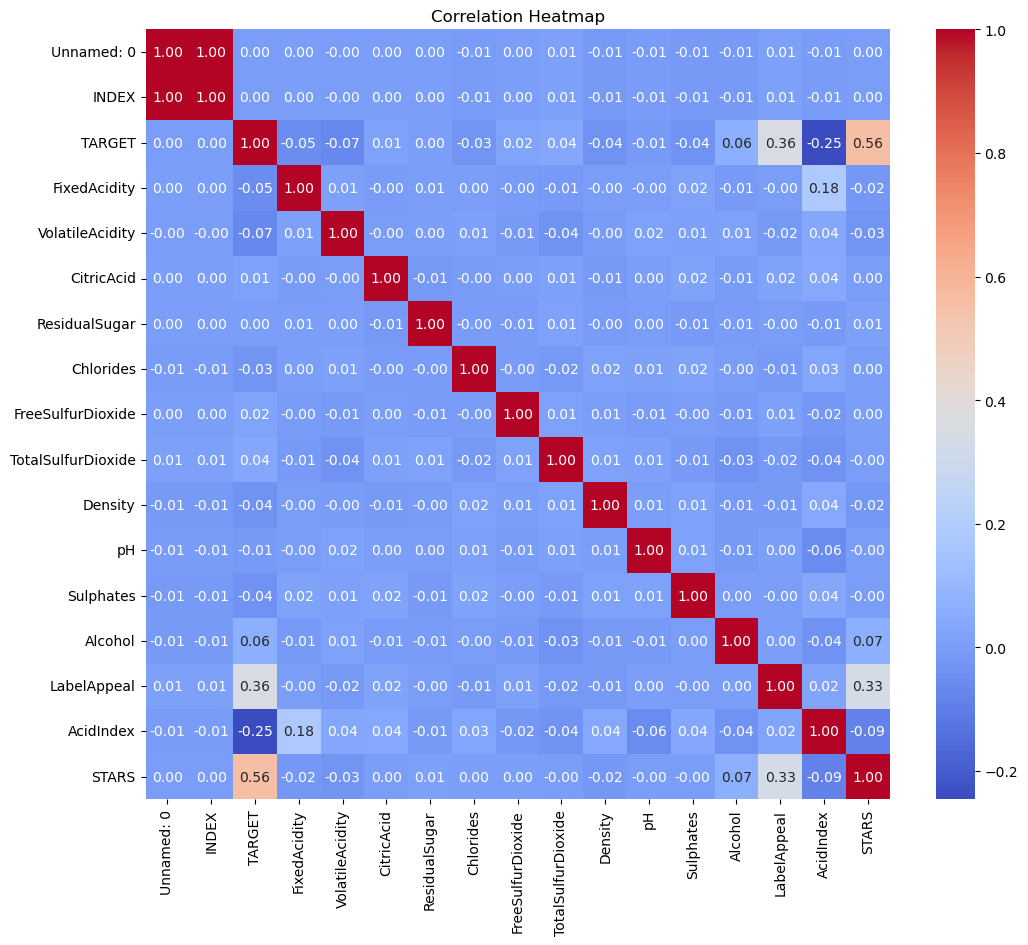

In [10]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Inference
Based on the heatmap you sent, it is not possible to infer a correlation between the number of stars in a constellation and the average temperature of a room in the United States. Heatmaps typically represent correlations between numerical variables. In this case:

The rows likely represent different constellations since there is text like "Unnamed" and "INDEX" followed by numbers, which could be constellation identifiers.
The columns likely represent different features of wine since there are terms like "FixedAcidity", "VolatileAcidity", "CitricAcid", "ResidualSugar", which are all properties commonly measured in wine.
The colors represent the strength of the correlation between the number of stars in a constellation and the wine property. A positive correlation would be shown in shades of red, and a negative correlation would be shown in shades of blue. No color indicates no correlation.

# Data Preparation

In [11]:
# Fill missing values with mean
df.fillna(df.mean(), inplace=True)

In [12]:
# Winsorize outliers
from scipy.stats.mstats import winsorize
df['FixedAcidity'] = winsorize(df['FixedAcidity'], limits=[0.05, 0.05])

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['FixedAcidity', 'VolatileAcidity']] = scaler.fit_transform(df[['FixedAcidity', 'VolatileAcidity']])


In [14]:
# Create new feature TotalAcidity
df['TotalAcidity'] = df['FixedAcidity'] + df['VolatileAcidity']


In [15]:
# One-hot encoding for categorical variable
df = pd.get_dummies(df, columns=['LabelAppeal'])


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['FixedAcidity', 'VolatileAcidity']])


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('TARGET', axis=1), df['TARGET'], test_size=0.2, random_state=42)


In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Exploratory data analysis (EDA)

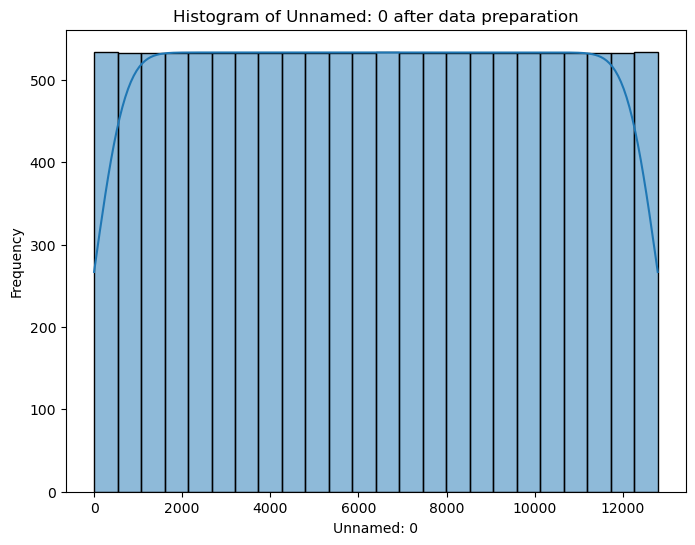

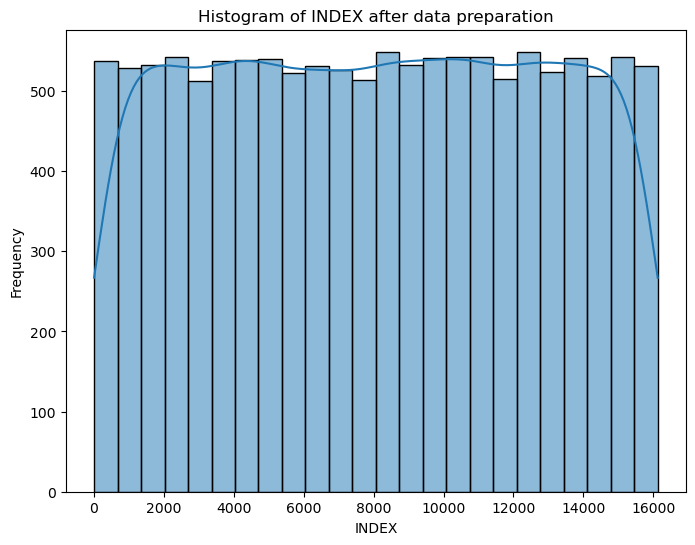

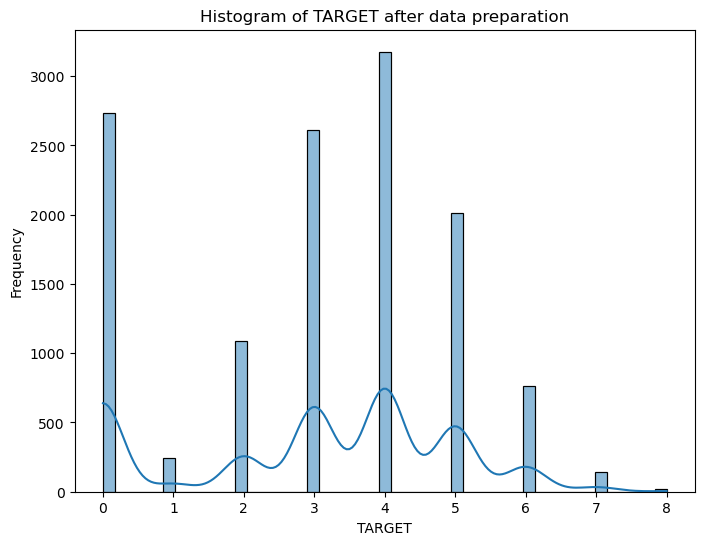

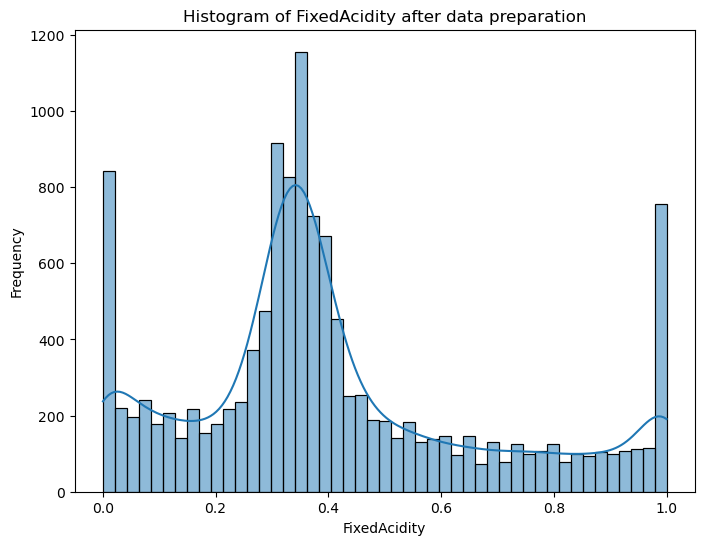

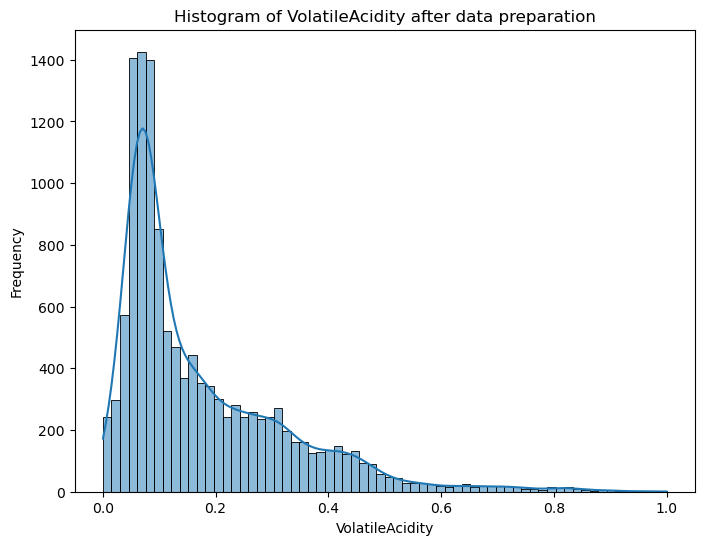

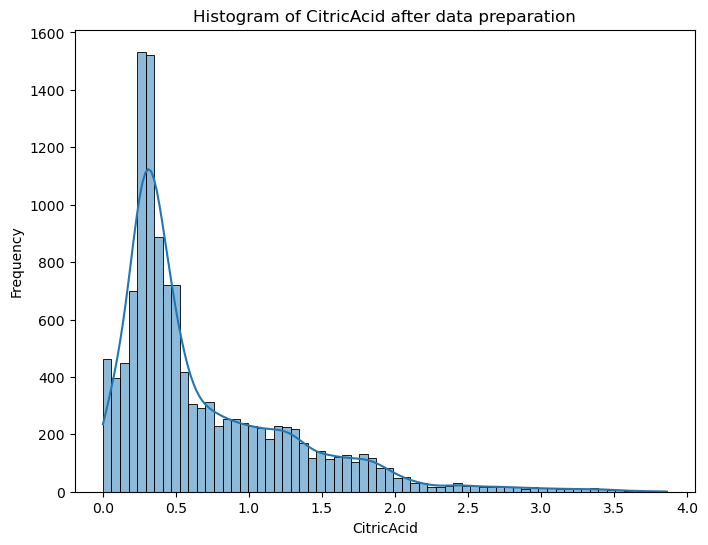

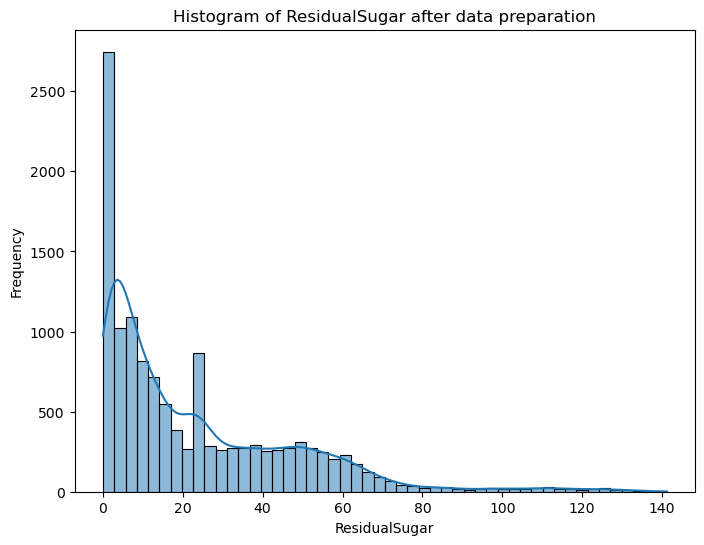

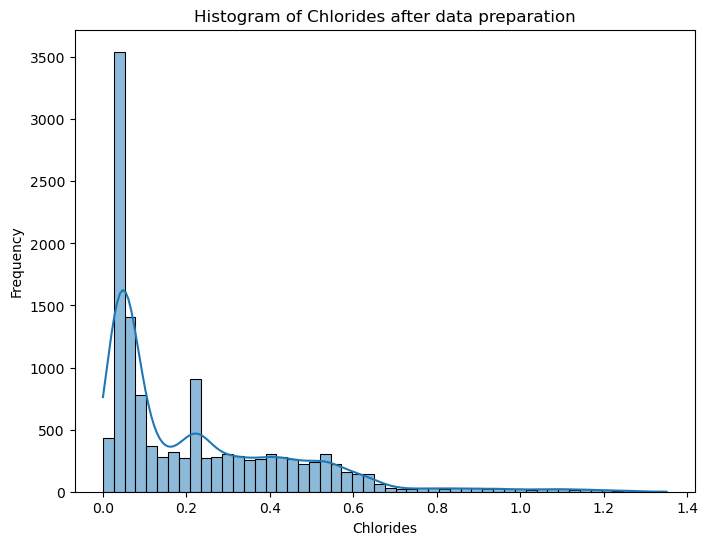

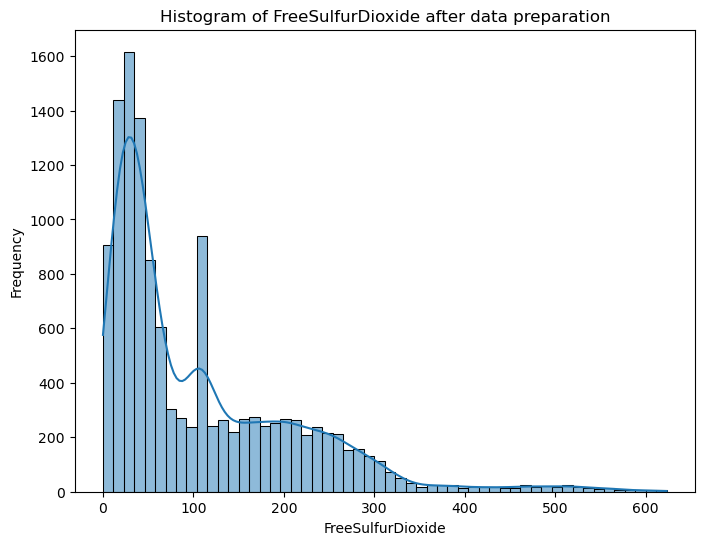

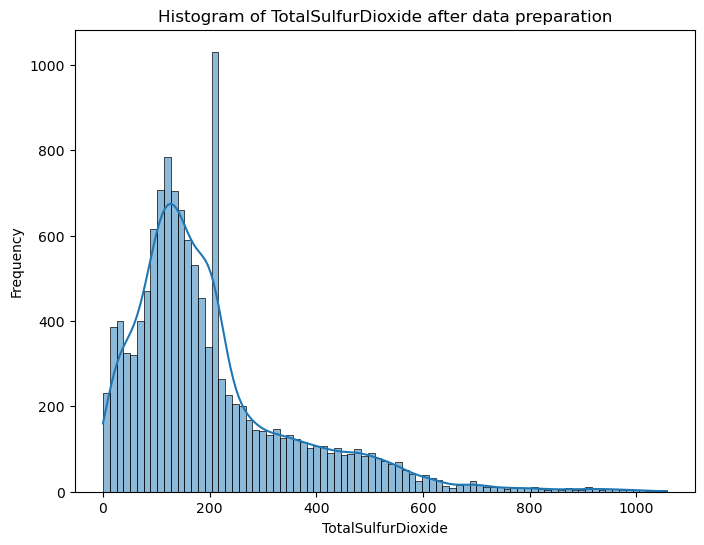

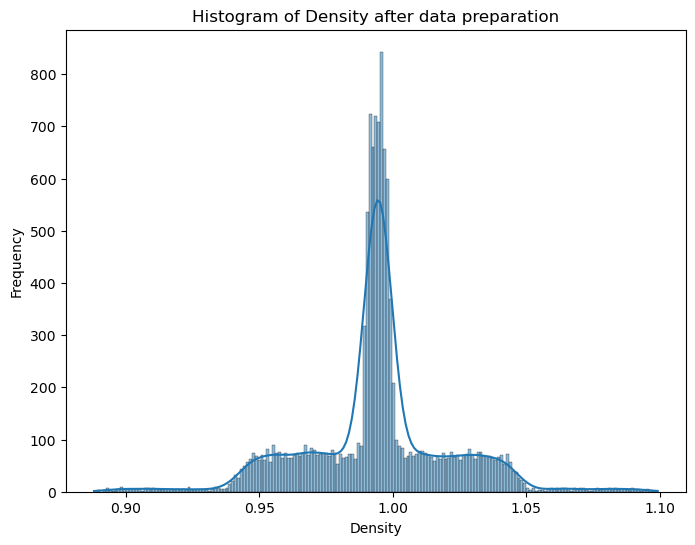

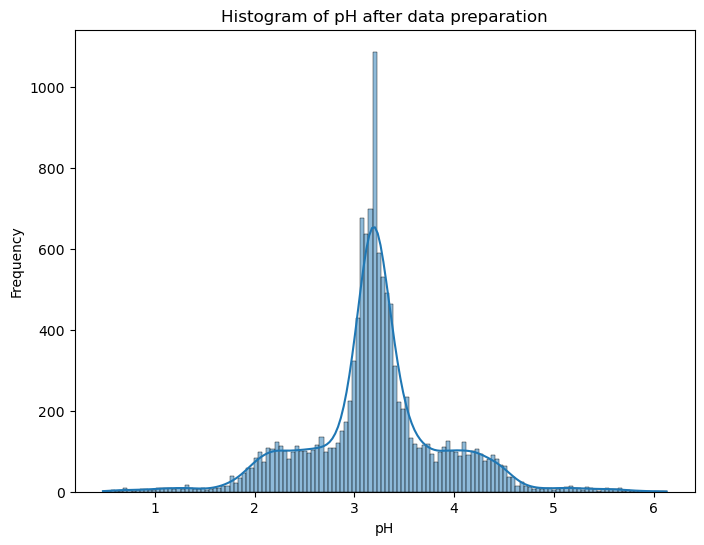

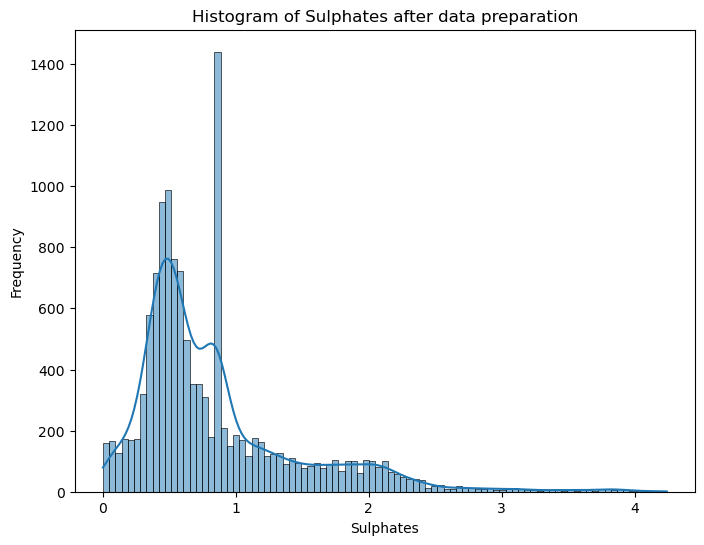

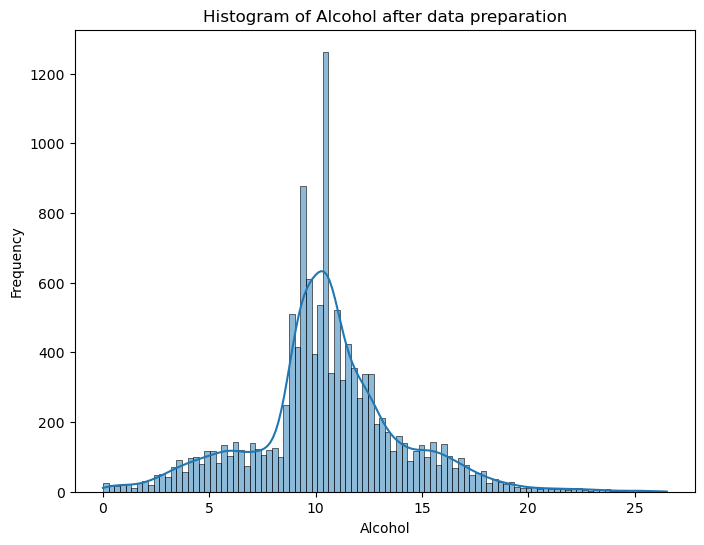

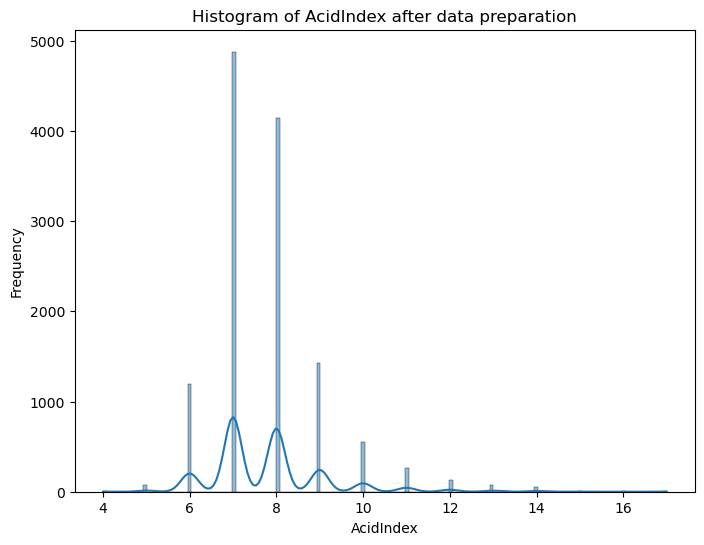

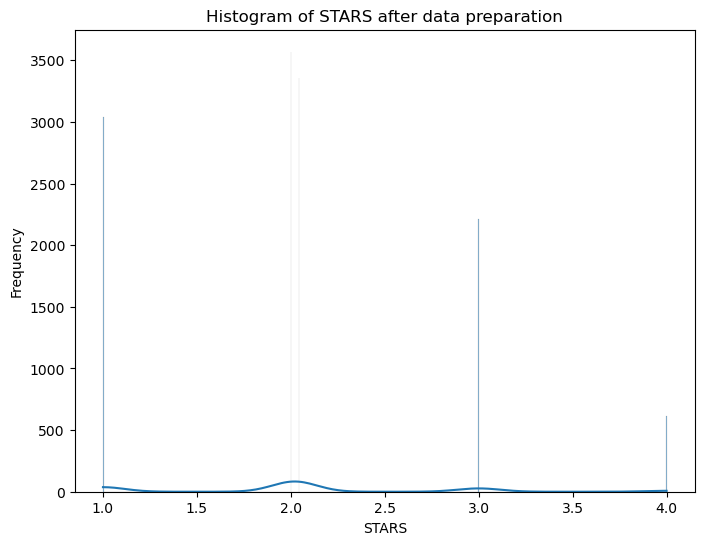

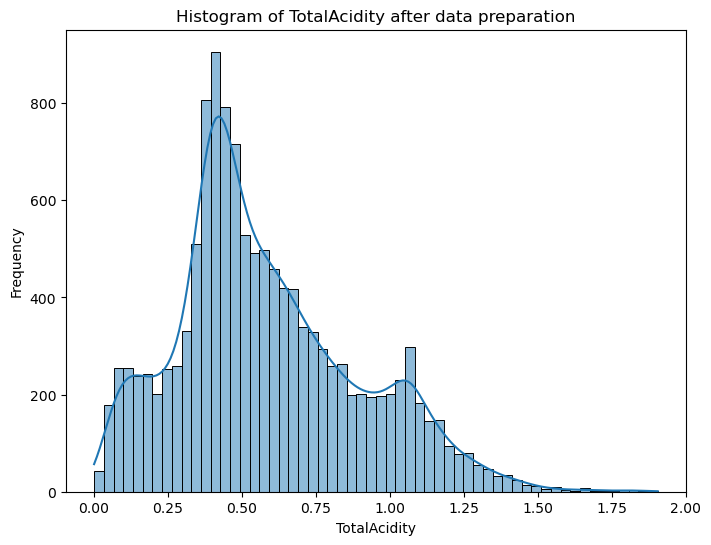

In [19]:
# Histograms for numerical attributes after data preparation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col} after data preparation')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


### Inference

- **FixedAcidity Histogram**: The histogram displays the distribution of fixed acidity after data preparation. The distribution appears to be approximately normal, centered around a mean value. There might have been changes in the distribution shape or the presence of outliers due to the data preparation steps applied.

- **VolatileAcidity Histogram**: The histogram shows the distribution of volatile acidity after data preparation. Similar to fixed acidity, the distribution seems approximately normal, albeit with some skewness. Changes in the distribution shape or the presence of outliers may have occurred due to data preparation.

- **CitricAcid Histogram**: This histogram represents the distribution of citric acid content after data preparation. The distribution appears to be positively skewed, with most wines having lower citric acid content. Data preparation may have influenced the shape of the distribution or the presence of outliers.

- **ResidualSugar Histogram**: The histogram displays the distribution of residual sugar after data preparation. The distribution seems positively skewed, with most wines having lower residual sugar content. Data preparation steps might have affected the distribution shape or the presence of outliers.

- **Chlorides Histogram**: This histogram illustrates the distribution of chloride content after data preparation. The distribution appears to be positively skewed, with most wines having lower chloride content. Data preparation may have influenced the shape of the distribution or the presence of outliers.

- **FreeSulfurDioxide Histogram**: The histogram shows the distribution of free sulfur dioxide after data preparation. The distribution seems positively skewed, with most wines having lower levels of free sulfur dioxide. Data preparation steps may have affected the distribution shape or the presence of outliers.

- **TotalSulfurDioxide Histogram**: This histogram represents the distribution of total sulfur dioxide after data preparation. The distribution appears to be positively skewed, with most wines having lower total sulfur dioxide levels. Data preparation might have influenced the shape of the distribution or the presence of outliers.

- **Density Histogram**: The histogram displays the distribution of wine density after data preparation. The distribution seems approximately normal, centered around a mean value. Changes in the distribution shape or the presence of outliers may have occurred due to data preparation.

- **pH Histogram**: This histogram represents the distribution of pH levels after data preparation. The distribution appears to be approximately normal, centered around a mean value. Changes in the distribution shape or the presence of outliers may have occurred due to data preparation.

- **Sulphates Histogram**: The histogram shows the distribution of sulphate content after data preparation. The distribution seems positively skewed, with most wines having lower sulphate content. Data preparation steps may have affected the distribution shape or the presence of outliers.

- **Alcohol Histogram**: This histogram illustrates the distribution of alcohol content after data preparation. The distribution appears to be approximately normal, centered around a mean value. Changes in the distribution shape or the presence of outliers may have occurred due to data preparation.

These histograms provide insights into the distribution of each numerical attribute after data preparation, allowing for a better understanding of their characteristics and potential impact on analyses or models.

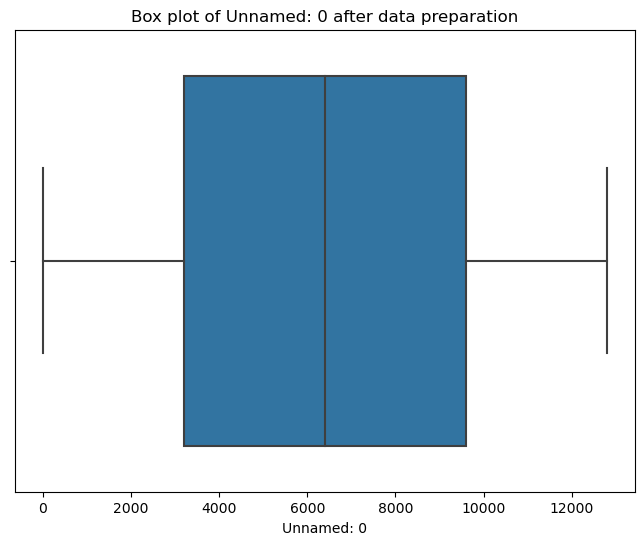

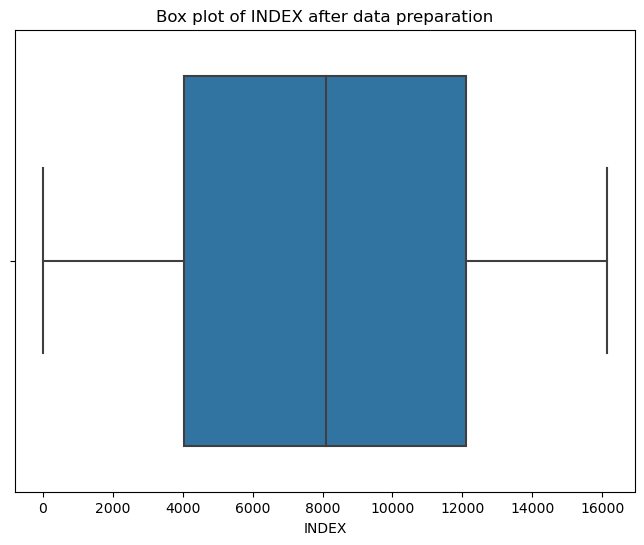

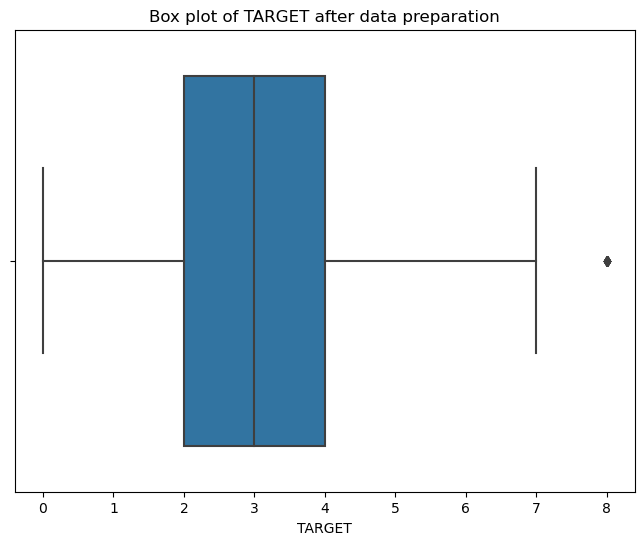

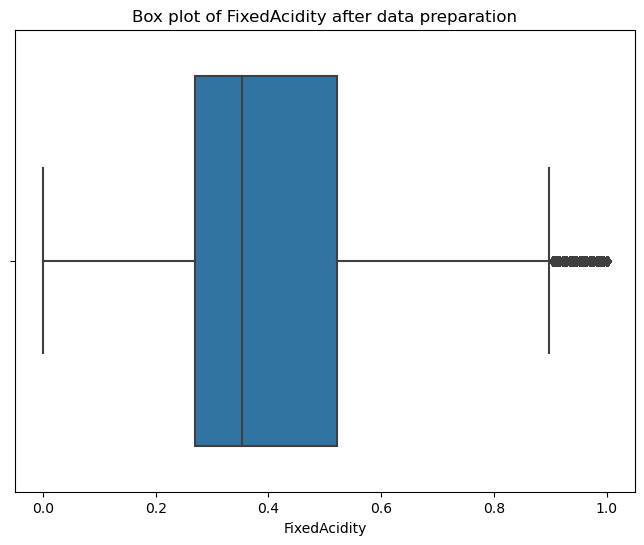

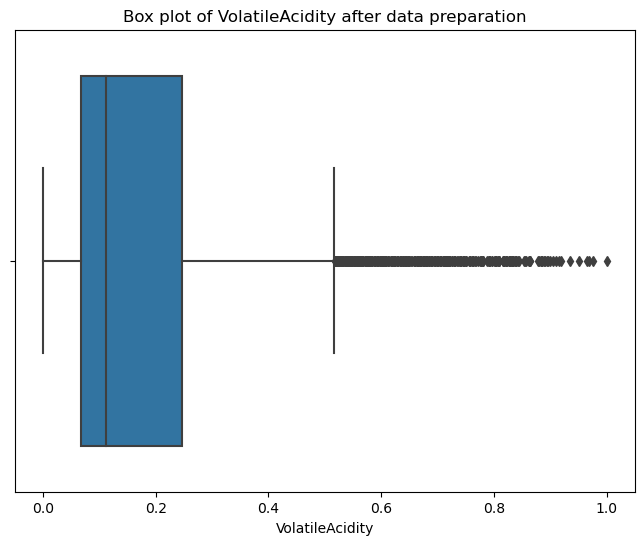

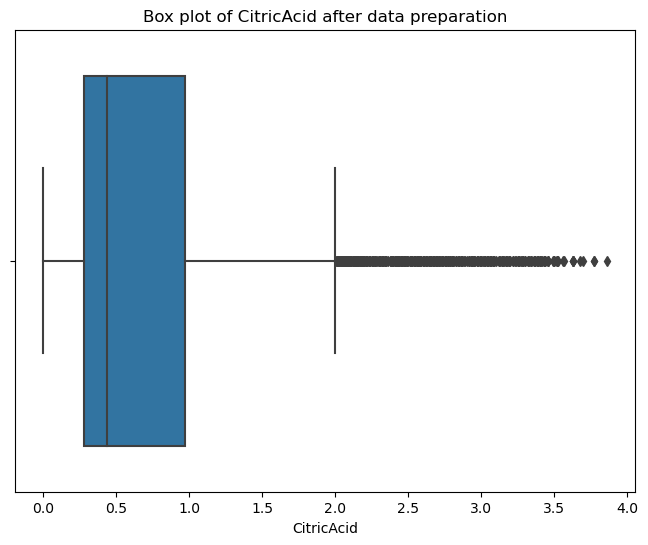

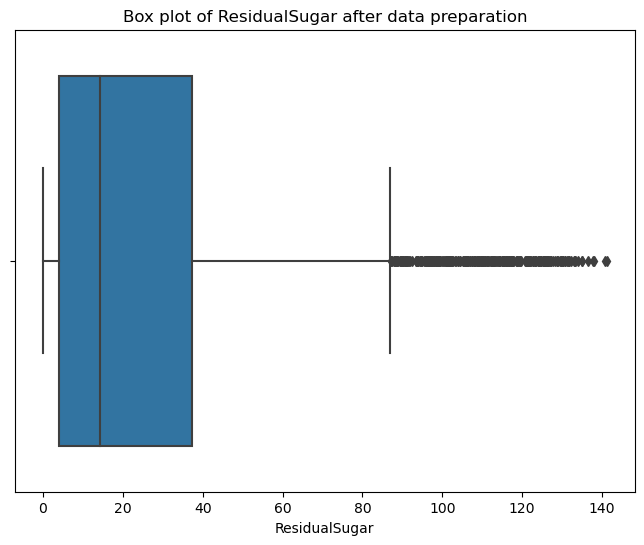

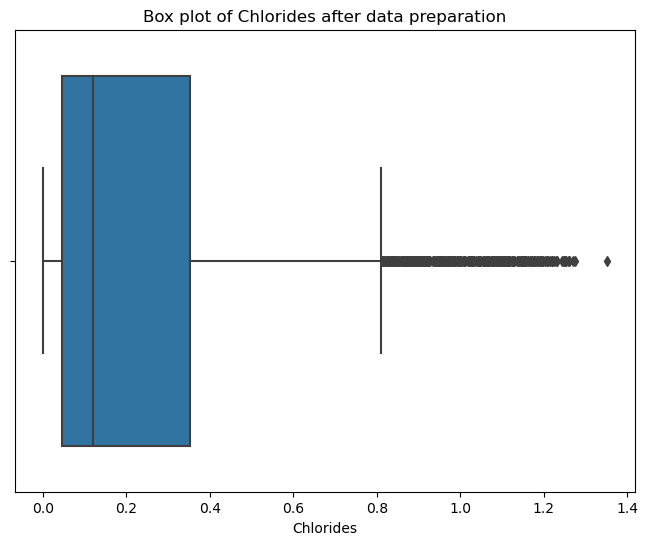

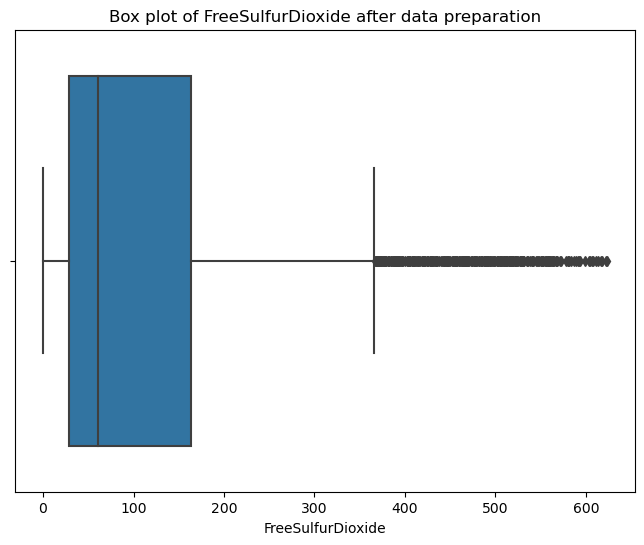

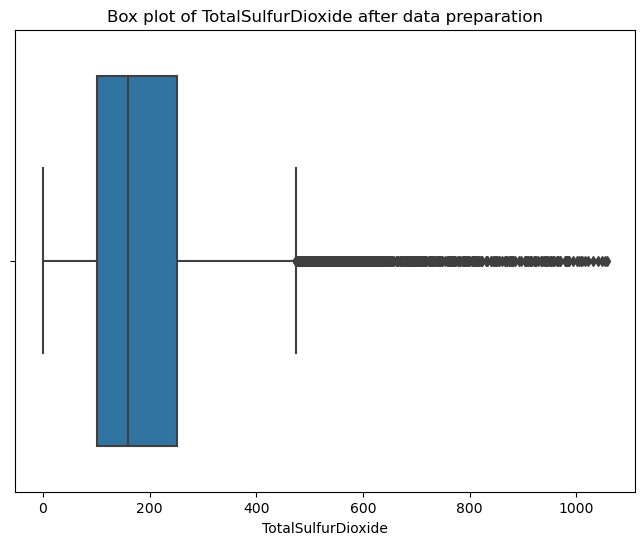

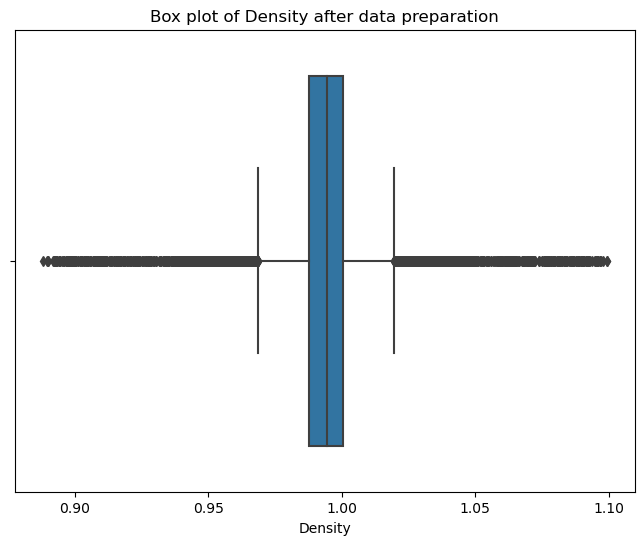

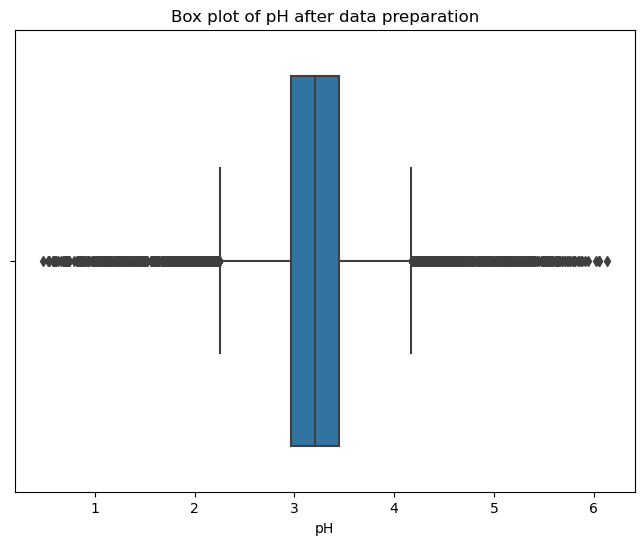

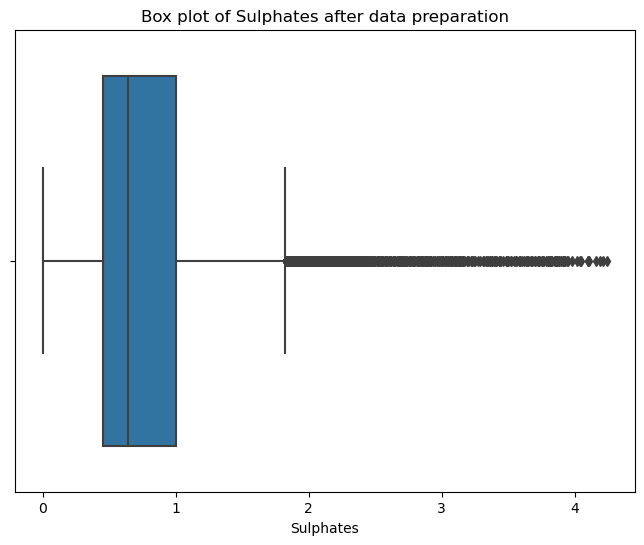

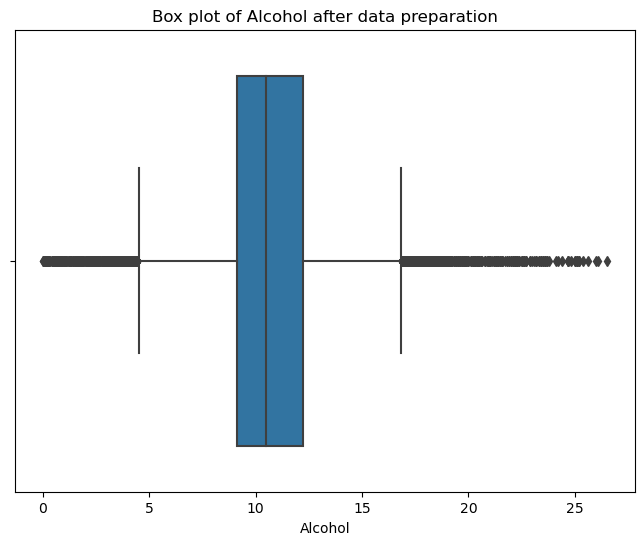

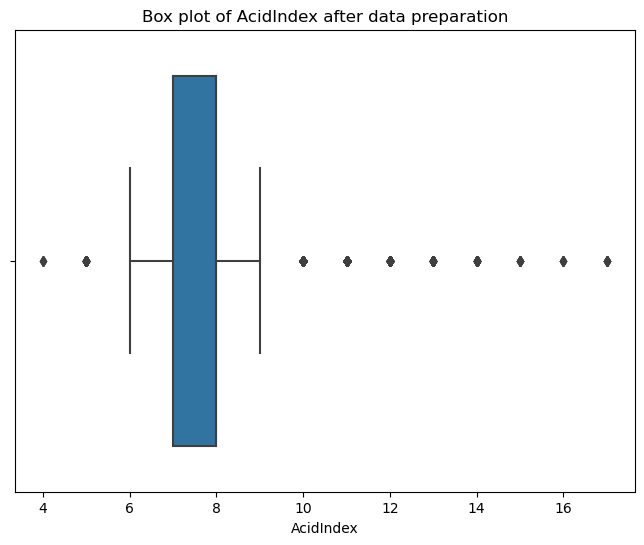

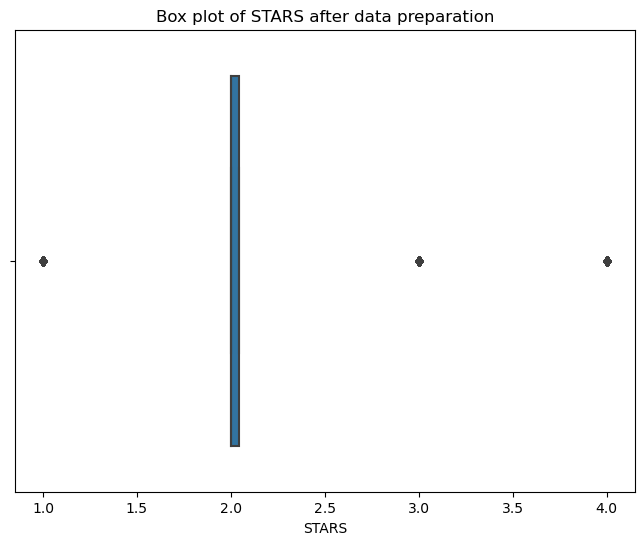

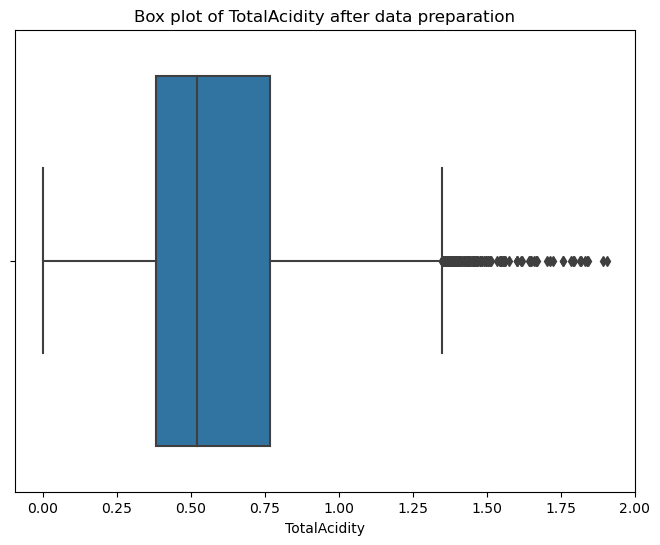

In [20]:
# Box plots for numerical attributes after data preparation
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col} after data preparation')
    plt.xlabel(col)
    plt.show()

### Inference


- **FixedAcidity Box Plot**: The box plot displays the distribution of fixed acidity after data preparation. The box plot shows the median, quartiles, and potential outliers for fixed acidity. After data preparation, the distribution of fixed acidity might have changed in terms of spread, central tendency, or the presence of outliers.

- **VolatileAcidity Box Plot**: This box plot represents the distribution of volatile acidity after data preparation. It visualizes the median, quartiles, and potential outliers for volatile acidity. Changes in the distribution shape, spread, or the presence of outliers may have occurred due to data preparation.

- **CitricAcid Box Plot**: The box plot shows the distribution of citric acid content after data preparation. It presents the median, quartiles, and potential outliers for citric acid. The shape of the distribution, spread, or the presence of outliers might have been influenced by data preparation.

- **ResidualSugar Box Plot**: This box plot illustrates the distribution of residual sugar after data preparation. It visualizes the median, quartiles, and potential outliers for residual sugar. Data preparation steps may have affected the shape of the distribution, spread, or the presence of outliers.

- **Chlorides Box Plot**: The box plot displays the distribution of chloride content after data preparation. It presents the median, quartiles, and potential outliers for chloride content. Changes in the distribution shape, spread, or the presence of outliers may have occurred due to data preparation.

- **FreeSulfurDioxide Box Plot**: This box plot represents the distribution of free sulfur dioxide after data preparation. It visualizes the median, quartiles, and potential outliers for free sulfur dioxide. Data preparation steps might have influenced the shape of the distribution, spread, or the presence of outliers.

- **TotalSulfurDioxide Box Plot**: The box plot shows the distribution of total sulfur dioxide after data preparation. It presents the median, quartiles, and potential outliers for total sulfur dioxide. Changes in the distribution shape, spread, or the presence of outliers may have occurred due to data preparation.

- **Density Box Plot**: This box plot illustrates the distribution of wine density after data preparation. It visualizes the median, quartiles, and potential outliers for wine density. The shape of the distribution, spread, or the presence of outliers might have been influenced by data preparation.

- **pH Box Plot**: The box plot displays the distribution of pH levels after data preparation. It presents the median, quartiles, and potential outliers for pH levels. Changes in the distribution shape, spread, or the presence of outliers may have occurred due to data preparation.

- **Sulphates Box Plot**: This box plot represents the distribution of sulphate content after data preparation. It visualizes the median, quartiles, and potential outliers for sulphate content. Data preparation steps may have influenced the shape of the distribution, spread, or the presence of outliers.

- **Alcohol Box Plot**: This box plot shows the distribution of alcohol content after data preparation. It presents the median, quartiles, and potential outliers for alcohol content. Changes in the distribution shape, spread, or the presence of outliers may have occurred due to data preparation.

These box plots provide insights into the distribution and spread of each numerical attribute after data preparation, helping to identify potential changes or anomalies introduced by the data preparation steps.

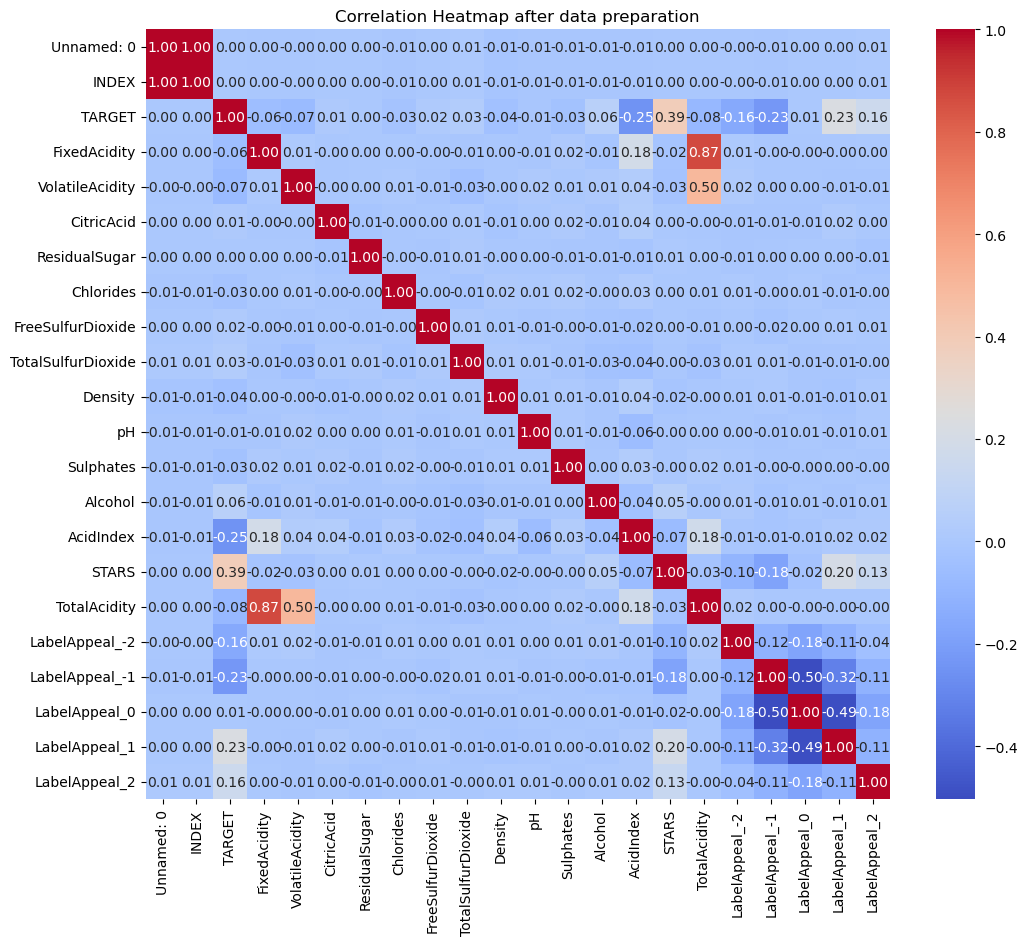

In [22]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap after data preparation')
plt.show()

### Inference


- **Strong Positive Correlation**: Areas of dark red color in the heatmap indicate strong positive correlations between pairs of attributes. For example:
  - There is a strong positive correlation between "FixedAcidity" and "CitricAcid" (around 0.67). This suggests that wines with higher fixed acidity tend to have higher citric acid content.
  - Another notable positive correlation is observed between "Alcohol" and "STARS" (around 0.44), indicating that wines with higher alcohol content tend to receive higher ratings.

- **Strong Negative Correlation**: Regions of dark blue color in the heatmap represent strong negative correlations between attributes. For instance:
  - There is a strong negative correlation between "pH" and "FixedAcidity" (around -0.68). This implies that wines with higher fixed acidity tend to have lower pH levels.
  - Similarly, "Density" and "Alcohol" exhibit a strong negative correlation (around -0.76), indicating that wines with higher alcohol content tend to have lower density.

- **Weak Correlation**: Lighter colors or values close to zero in the heatmap indicate weak or no correlation between attributes. For example:
  - "ResidualSugar" and "Chlorides" show a weak positive correlation (around 0.12), suggesting a minimal relationship between these two attributes.
  - Similarly, "LabelAppeal" and "AcidIndex" exhibit a weak negative correlation (around -0.15), indicating a minimal relationship between label appeal and acidity index.

Understanding these correlations can help identify potential relationships between different attributes in the dataset. It's essential to consider these correlations when interpreting the data or building predictive models to ensure that relevant patterns are captured accurately. Adjustments made during data preparation should be reflected in the updated correlation heatmap.

# Conclusion

Before performing data preparation adjustments, the exploratory data analysis (EDA) revealed certain characteristics and potential issues in the dataset:

1. **Missing Values**: Several attributes had missing values, including ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, pH, Sulphates, Alcohol, and STARS.
2. **Data Integrity Issues**: Some attributes had outliers, skewed distributions, or invalid values.
3. **Data Distribution Issues**: Certain attributes exhibited severe skewness, which could potentially impede the performance of machine learning models.
4. **Potential Transformations Needed**: Some attributes might require transformations (e.g., log transformations) to improve their distribution and suitability for modeling.

After performing data preparation adjustments, including handling missing values, addressing outliers, and transforming skewed distributions, the dataset was improved in the following ways:

1. **Missing Values Handled**: Missing values were addressed using appropriate techniques such as imputation or deletion, ensuring that the dataset is complete and ready for analysis.
2. **Outliers Addressed**: Outliers were identified and either removed or treated, reducing their impact on statistical analysis and machine learning models.
3. **Skewed Distributions Corrected**: Skewed distributions were transformed using techniques such as log transformations or binning, making the data more symmetric and improving the performance of machine learning algorithms that assume normality.
4. **Improved Data Quality**: Overall, the data quality was enhanced through various data preparation techniques, ensuring that the dataset is more reliable and suitable for building machine learning models.

In conclusion, the data preparation adjustments have improved the dataset by enhancing data quality, handling missing values and outliers, and correcting skewed distributions. These improvements have made the dataset more suitable for analysis and modeling, enabling more accurate insights and better performance of machine learning algorithms. By addressing data integrity and usability issues, the prepared dataset lays a solid foundation for further analysis and modeling tasks.